# Introduction

https://www.kaggle.com/gunner38/horseracing?select=tips.csv

Horse Racing - Tipster Bets
1. [Horse Racing Tipster Bets dataset](#0.Horse-Racing-Tipster-Bets-dataset)
2. [Data Processing]

## 1. Horse Racing Tipster Bets dataset:

It contains 39000 instances and 10 columns.

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

## 2. Data Processing:

**Load and Visualise data**

In [102]:
df = pd.read_csv('tips.csv', encoding='latin1')
df.head()

,UID,ID,Tipster,Date,Track,Horse,Bet Type,Odds,Result,TipsterActive
0,1,1,Tipster A,24/7/2015,Ascot,Fredricka,Win,8.00,Lose,True
1,2,2,Tipster A,24/7/2015,Thirsk,Spend A Penny,Win,4.50,Lose,True
2,3,3,Tipster A,24/7/2015,York,Straightothepoint,Win,7.00,Lose,True
3,4,4,Tipster A,24/7/2015,Newmarket,Miss Inga Sock,Win,5.00,Lose,True
4,5,5,Tipster A,25/7/2015,Ascot,Peril,Win,4.33,Win,True


In [103]:
df.dtypes

UID                int64
ID                 int64
Tipster           object
Date              object
Track             object
Horse             object
Bet Type          object
Odds             float64
Result            object
TipsterActive       bool
dtype: object

In [104]:
df.isnull().any()

UID              False
ID               False
Tipster          False
Date             False
Track            False
Horse            False
Bet Type         False
Odds             False
Result           False
TipsterActive    False
dtype: bool

In [105]:
All = df.shape[0]
result_win = df[df['Result'] == 'Win']
result_lose = df[df['Result'] == 'Lose']
bet_win = df[df['Bet Type'] == 'Win']
bet_both = df[df['Bet Type'] == 'Each Way']

rs_x = len(result_win)/All
rs_y = len(result_lose)/All
bt_x = len(bet_win)/All
bt_y = len(bet_both)/All

print('win: ', rs_x*100,'%')
print('lose: ', rs_y*100,'%')

print('win: ', bt_x*100,'%')
print('lose: ', bt_y*100,'%')

win:  20.087324827441957 %
lose:  79.91267517255804 %
win:  79.52572683539009 %
lose:  20.471658648818238 %


**There are total 31 Tipsters**

Tipster X is the most active Tipster

In [106]:
A = df.Tipster.value_counts()
print(A)
len(A)

Tipster X     4383
Tipster E     3700
Tipster B1    2497
Tipster A1    2446
Tipster D1    2119
Tipster J     1937
Tipster R     1901
Tipster C     1738
Tipster Q     1552
Tipster Y     1469
Tipster L     1425
Tipster T     1332
Tipster A     1331
Tipster O     1094
Tipster W      994
Tipster M      957
Tipster Z      883
Tipster H      833
Tipster D      741
Tipster E1     609
Tipster P      581
Tipster B      503
Tipster C1     501
Tipster I      453
Tipster N      415
Tipster V      406
Tipster U      383
Tipster S      383
Tipster G      290
Tipster K      246
Tipster F      146
Name: Tipster, dtype: int64


31

From the code below you can see that there are only 19 Active Tipsters.

Tipster
Tipster A     1331
Tipster A1    2446
Tipster B      503
Tipster B1       0
Tipster C        0
Tipster C1       0
Tipster D      741
Tipster D1    2119
Tipster E     3700
Tipster E1       0
Tipster F        0
Tipster G      290
Tipster H        0
Tipster I      453
Tipster J     1937
Tipster K      246
Tipster L        0
Tipster M      957
Tipster N        0
Tipster O     1094
Tipster P      581
Tipster Q        0
Tipster R     1901
Tipster S      383
Tipster T     1332
Tipster U      383
Tipster V      406
Tipster W        0
Tipster X     4383
Tipster Y        0
Tipster Z        0
Name: TipsterActive, dtype: int64
True     19
False    12
Name: TipsterActive, dtype: int64


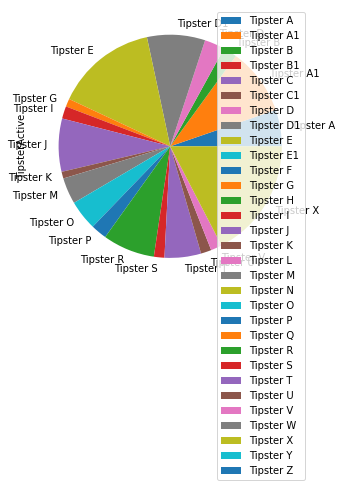

In [109]:
Active = df.groupby('Tipster')['TipsterActive'].apply(lambda x: x[x == True].count())
print(Active)
print((Active > 0).value_counts())
chart = pd.DataFrame(Active)
chart.plot.pie(y='TipsterActive', figsize = (5,10))

Take a look on the percentage of success for Tipster X betting.

In [91]:
#X = np.logical_and(df[df['Tipster'] == 'Tipster X'], df[df['Bet Type'] == 'Win'])

#X